<a href="https://colab.research.google.com/github/Fuad3004/Neural-Network-Binary-Classification/blob/main/sklearn_datasets_make_circles_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neural Network Binary Classification:

*  Data Loading: Here I used make circle datasets
* Used pandas DataFrame to check feature data and output label
* Data Visualization using Matplotlib
* Convert datatype into tensor. Using torch.form_numpy(x).type(torch.float)
* Split the data into train and test
* Create a MakeCircleModel class with linear layer and using ReLu()
* Train Model:
	Loss Function,
	Optimizer (Tried Different lr values 0.1 and 0.01),
	Accuracy function,
	Training Loop.
* Plot the data


In [ ]:
import torch
import sklearn

#Data Input

In [ ]:
from sklearn.datasets import make_circles 
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html

n_samples=1000
TRY_NOISE=0.03 #check diff options
X,y= make_circles(n_samples, noise=TRY_NOISE, random_state=33)

len(X), len(y)

(1000, 1000)

In [ ]:
X[:5],y[:5] 

(array([[-0.92631372, -0.44504141],
        [ 0.34889196, -0.92585137],
        [-0.90612188, -0.02167732],
        [ 1.05520498,  0.01292639],
        [ 0.00257544, -1.00524639]]),
 array([0, 0, 0, 0, 0]))

So data are in numpy array!
Now make a dataframe to understand the data more!

In [ ]:
import pandas as pd

circles=pd.DataFrame({"Feature Data 1": X[:,0],
                      "Feature Data 2": X[:,1],
                      "Output Label":y})
circles

,Feature Data 1,Feature Data 2,Output Label
0,-0.926314,-0.445041,0
1,0.348892,-0.925851,0
2,-0.906122,-0.021677,0
3,1.055205,0.012926,0
4,0.002575,-1.005246,0
...,...,...,...
995,-0.346955,0.764172,1
996,0.474477,0.642467,1
997,-0.778041,0.144401,1
998,0.241981,-0.984062,0


In [ ]:
circles.head(10)

,Feature Data 1,Feature Data 2,Output Label
0,-0.926314,-0.445041,0
1,0.348892,-0.925851,0
2,-0.906122,-0.021677,0
3,1.055205,0.012926,0
4,0.002575,-1.005246,0
5,0.194185,0.971642,0
6,-0.764745,-0.216221,1
7,0.826694,-0.534939,0
8,-0.965785,0.227521,0
9,-0.320701,0.725029,1


#Data Visualization

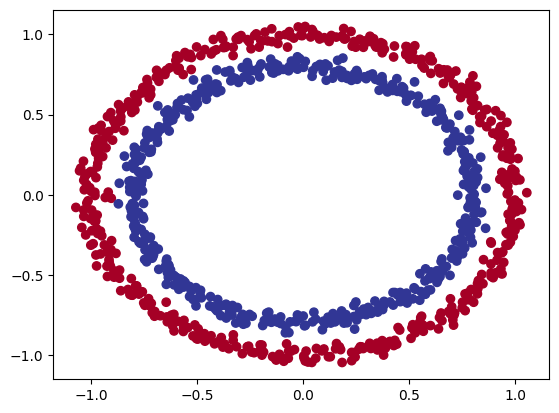

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap="RdYlBu");

#Convert input types to tensor

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X.dtype, y.dtype

(dtype('float64'), dtype('int64'))

In [ ]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)


In [ ]:
X.dtype , y.dtype

(torch.float32, torch.float32)

In [ ]:
type(X), type(y)

(torch.Tensor, torch.Tensor)

In [ ]:
X[:5],y[:5]

(tensor([[-0.9263, -0.4450],
         [ 0.3489, -0.9259],
         [-0.9061, -0.0217],
         [ 1.0552,  0.0129],
         [ 0.0026, -1.0052]]),
 tensor([0., 0., 0., 0., 0.]))

Coverted data from numpy arra to tensor

#Split the Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=33)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

#Build The Model

In [ ]:
# Making a device agnostic code

device="cude" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
from torch import nn

class MakeCircleModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1=nn.Linear(in_features=2, out_features=10)
    self.layer_2=nn.Linear(in_features=10, out_features=10)
    self.layer_3=nn.Linear(in_features=10, out_features=1)
    self.relu= nn.ReLU()

  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_f= MakeCircleModel().to(device)
print(model_f)

MakeCircleModel(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


#Train Model

In [ ]:
#creat Loss Function --->>>>>> optimizer  ------>>>>> Accuracy Function

loss_fn = nn.BCEWithLogitsLoss()

optimizer= torch.optim.SGD(model_f.parameters(), lr=0.01)

def accuracy_fn(y_true, y_preds):

  total_correct=torch.eq(y_true, y_preds).sum().item()
  acc=(total_correct/len(y_preds))*100
  return acc

In [ ]:
torch.manual_seed(33)
epochs=1000

#put all data on target device

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# --------->>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Train the model <<<<<<<<<<<<<---------

for epoch in range(epochs):

  y_logits=model_f(X_train).squeeze()
  y_pred= torch.round(torch.sigmoid(y_logits))

  loss=loss_fn(y_logits, y_train)
  
  acc= accuracy_fn(y_true = y_train,
                   y_preds = y_pred)
  
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

#--------->>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>Testing <<<<<<<<<<<<<<<<<<<<<------------ 

  model_f.eval()
  
  with torch.inference_mode():

    test_logits = model_f(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    test_loss=loss_fn(test_logits, y_test)

    test_acc= accuracy_fn(y_true = y_test,
                          y_preds=test_pred)
    
#--------->>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Ending <<<<<<<<<<<<<<<<<<<<<------------ 

  if epoch % 100==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.54324, Accuracy: 93.50% | Test Loss: 0.55165, Test Accuracy: 90.00%
Epoch: 100 | Loss: 0.53405, Accuracy: 93.88% | Test Loss: 0.54287, Test Accuracy: 90.00%
Epoch: 200 | Loss: 0.52449, Accuracy: 94.25% | Test Loss: 0.53360, Test Accuracy: 90.50%
Epoch: 300 | Loss: 0.51458, Accuracy: 95.12% | Test Loss: 0.52377, Test Accuracy: 91.00%
Epoch: 400 | Loss: 0.50421, Accuracy: 95.75% | Test Loss: 0.51344, Test Accuracy: 92.50%
Epoch: 500 | Loss: 0.49354, Accuracy: 95.75% | Test Loss: 0.50289, Test Accuracy: 93.00%
Epoch: 600 | Loss: 0.48254, Accuracy: 96.25% | Test Loss: 0.49202, Test Accuracy: 93.50%
Epoch: 700 | Loss: 0.47131, Accuracy: 96.62% | Test Loss: 0.48078, Test Accuracy: 94.00%
Epoch: 800 | Loss: 0.45994, Accuracy: 96.50% | Test Loss: 0.46945, Test Accuracy: 94.00%
Epoch: 900 | Loss: 0.44841, Accuracy: 96.88% | Test Loss: 0.45774, Test Accuracy: 96.00%


 * 1st time with lr=0.1 I got Test Accuracy: 81.00%  
 * with lr=0.01 I got Test Accuracy: 96.00%

 Happy KIDDO!

In [ ]:

#without test logits

model_f.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_f(X_test))).squeeze()
y_preds[:10], y[:10]

print(f"Predictions: {y_preds[:10]}\nLabels: {y_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_test, y_pred=y_preds)}%")

(tensor([1., 1., 1., 0., 1., 0., 1., 0., 0., 1.]),
 tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 1.]))

In [ ]:
import numpy as np
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.
    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    def plot_predictions(train_data, train_labels, test_data, test_labels, predictions=None):
  # """
  # Plots linear training data and test data and compares predictions.
  # """
      plt.figure(figsize=(10, 7))

      # Plot training data in blue
      plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

      # Plot test data in green
      plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

      if predictions is not None:
          # Plot the predictions in red (predictions were made on the test data)
          plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

      # Show the legend
      plt.legend(prop={"size": 14})

  

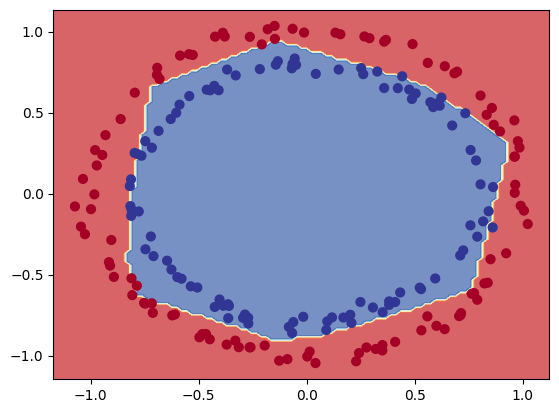

In [ ]:

plot_decision_boundary(model_f, X_test, y_test)